# fig — recon

**Motivation**: host = ```mach```, device = ```cuda:0``` <br>

In [1]:
# HIDE CODE


import os, sys
from IPython.display import display

# tmp & extras dir
git_dir = os.path.join(os.environ['HOME'], 'Dropbox/git')
extras_dir = os.path.join(git_dir, 'jb-vae/_extras')
fig_base_dir = os.path.join(git_dir, 'jb-vae/figs')
tmp_dir = os.path.join(git_dir, 'jb-vae/tmp')

# GitHub
sys.path.insert(0, os.path.join(git_dir, '_IterativeVAE'))
from figures.fighelper import *
from vae.train_vae import *

# warnings, tqdm, & style
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning)
from rich.jupyter import print
%matplotlib inline
set_style()

In [2]:
from analysis.helper import first_digit_inds
from figures.analysis import *

device_idx = 0
device = f'cuda:{device_idx}'

print(f"device: {device}  ———  host: {os.uname().nodename}")

device: cuda:0  ———  host: mach

In [3]:
fig_dir = pjoin(fig_base_dir, 'iclr_oct02', 'recon')
os.makedirs(fig_dir, exist_ok=True)
print(os.listdir(fig_dir))

kws_fig = {
    'transparent': True,
    'bbox_inches': 'tight',
    'dpi': 300,
}

[]

## VAE: amort and iterative

In [4]:
kws = dict(
    device=device,
    shuffle=False,
    strict=True,
)

### iP-VAE

In [5]:
mnist_to_load = get_mnist_models(device)
print(sorted(mnist_to_load))

[
    '<conv|conv>_(16,8.0)',
    '<conv|conv>_(4,1.5)',
    '<jacob|conv>_(16,8.0)',
    '<jacob|conv>_(2,0.75)',
    '<jacob|conv>_(4,1.5)',
    '<jacob|mlp>_(16,8.0)',
    '<jacob|mlp>_(4,1.5)',
    '<jacob|mlp>_(64,24.0)',
    '<mlp|mlp>_(16,8.0)',
    '<mlp|mlp>_(4,1.5)',
    '<mlp|mlp>_(64,24.0)'
]

In [6]:
trainers = {}
for name, kwargs in tqdm(mnist_to_load.items()):
    trainers[name] = load_model(**kwargs)[0]

100%|███████████████████████████████████████████| 11/11 [00:14<00:00,  1.35s/it]


## Save recon figs

______________________________________________________________________________________________________________

<jacob|conv>_(2,0.75)

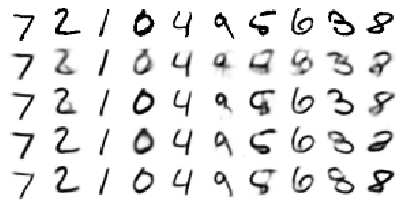

______________________________________________________________________________________________________________

<jacob|conv>_(4,1.5)

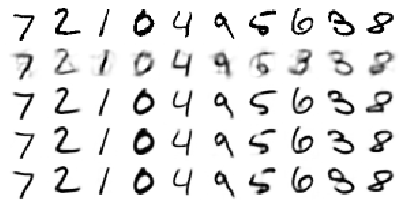

______________________________________________________________________________________________________________

<conv|conv>_(4,1.5)

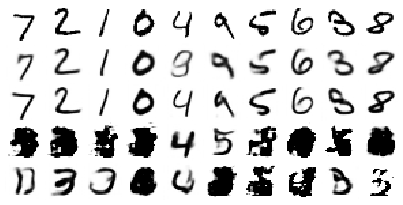

______________________________________________________________________________________________________________

<jacob|conv>_(16,8.0)

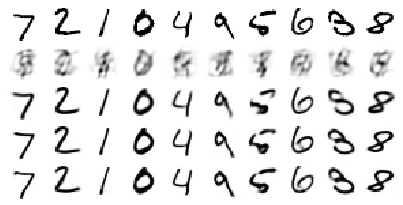

______________________________________________________________________________________________________________

<conv|conv>_(16,8.0)

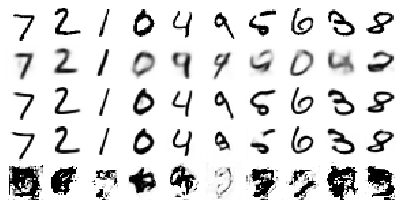

______________________________________________________________________________________________________________

<jacob|mlp>_(4,1.5)

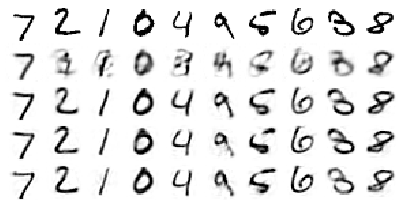

______________________________________________________________________________________________________________

<mlp|mlp>_(4,1.5)

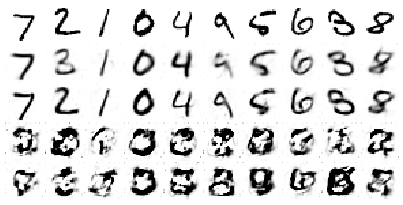

______________________________________________________________________________________________________________

<jacob|mlp>_(16,8.0)

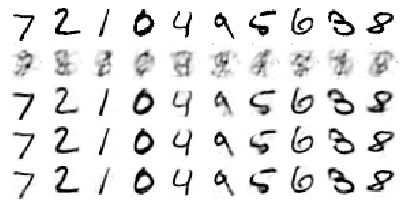

______________________________________________________________________________________________________________

<mlp|mlp>_(16,8.0)

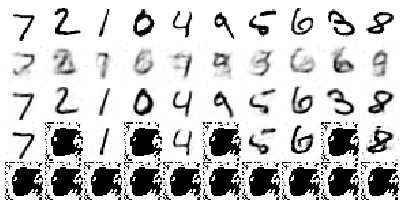

______________________________________________________________________________________________________________

<jacob|mlp>_(64,24.0)

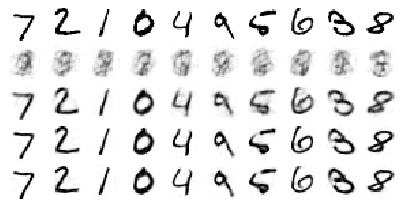

______________________________________________________________________________________________________________

<mlp|mlp>_(64,24.0)

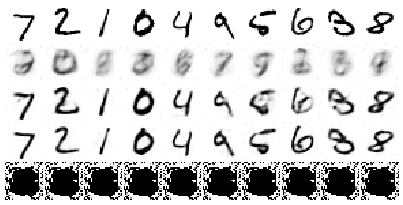

CPU times: user 2min 17s, sys: 12.3 s, total: 2min 29s
Wall time: 6min 41s


In [7]:
%%time

for name, tr in trainers.items():
    x, g = tr.dl_vld.dataset.tensors
    inds = first_digit_inds(g)
    x = tonp(x)[inds]
    
    output = tr.model.xtract_ftr(
        x=tr.to(x),
        seq=range(1000),
        return_extras=True,
    ).stack()
    
    recon = [output['recon'][:, t, :] for t in [0, 9, 99, 999]]
    recon = [tonp(e).reshape(tr.model.cfg.shape) for e in recon]
    x2p = np.concatenate([x] + recon)
    # x2p = x2p.reshape((-1, len(inds), *x2p.shape[1:]))
    # x2p = x2p.transpose((1, 0, 2, 3, 4))
    # x2p = x2p.reshape(tr.model.cfg.shape)

    print('_' * 110)
    print(name)

    # save figs
    fig_name = f'recon-MNIST_{name}'

    fig, ax = plot_weights(x2p, nrows=len(recon) + 1, cmap='Greys', method='none', vmin=0.001, vmax=1.0, dpi=50)
    fig.savefig(pjoin(fig_dir, f"{fig_name}.png"), **kws_fig)

    fig, ax = plot_row_or_col(x, row=True, display=False)
    fig.savefig(pjoin(fig_dir, f"{fig_name}_input.png"), **kws_fig)
    for t in [0, 9, 99, 999]:
        x2p = tonp(output['recon'][:, t, :])
        x2p = x2p.reshape(tr.model.cfg.shape)
        fig, ax = plot_row_or_col(x2p, row=True, display=False)
        fig.savefig(pjoin(fig_dir, f"{fig_name}_t={t}.png"), **kws_fig)

    print('\n\n')